## Notebook to interact with and visualise cortical intensity profiles

In [1]:
import numpy as np
import nibabel as nb
import matplotlib_surface_plotting as msp
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
#load mesh data
data_dir='../data'
surf=nb.load(os.path.join(data_dir,'gray_left_327680.surf.gii'))
vertices, faces = surf.darrays[0].data,surf.darrays[1].data

In [3]:
#load profiles
profiles = np.load(os.path.join(data_dir,'profiles_left.npy'))
#load parcellation
parcellation=np.loadtxt(os.path.join(data_dir,'HCP_left.txt'),dtype=int)
labels = np.loadtxt(os.path.join(data_dir,'HCP_labels.txt'),dtype=str)


In [4]:
print(profiles.shape)
print(vertices.shape)
print(parcellation.shape)

(163842, 200)
(163842, 3)
(163842,)


let's plot a single profile

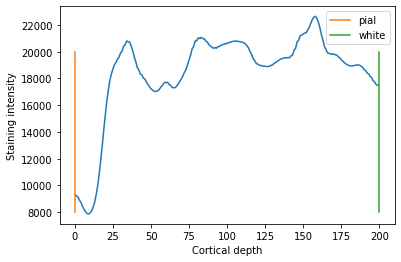

In [5]:
plt.plot(profiles[400])
plt.plot([0,0],[8000,20000],label='pial')
plt.plot([200,200],[8000,20000],label='white')
plt.xlabel('Cortical depth')
plt.ylabel('Staining intensity')
plt.legend()

## Workshop task 1
Plot a profile from V1 and S1

In [6]:
v1_vertices = np.where(parcellation==1)[0]

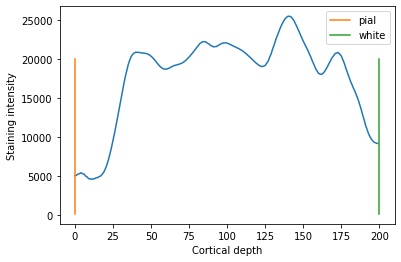

In [35]:
plt.plot(profiles[v1_vertices[54]])
plt.plot([0,0],[200,20000],label='pial')
plt.plot([200,200],[200,20000],label='white')
plt.xlabel('Cortical depth')
plt.ylabel('Staining intensity')
plt.legend()
#In the example below, you can see 4 peaks, while above there are only 3.
#The additional peaks come from subdivisions of the thickened layer IV found in V1

## Workshop task 2
Animal studies predict a rostro-caudal gradient of neuronal density, with higher densities at the back of the brain. Staining intensity is driven by cell-body density and size.

Plot the mean staining intensity of each profile in the rostro-caudal/front back direction

Hint : vertices[:,1] gives the front-back coordinate of each vertex

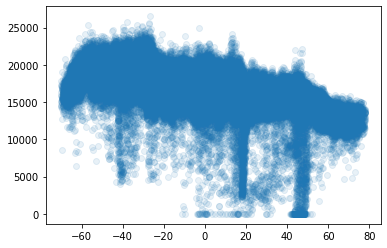

In [43]:
mean_staining_intensity = np.mean(profiles,axis=1)
rc_coord = vertices[:,1]
plt.scatter(rc_coord[parcellation>0],mean_staining_intensity[parcellation>0],alpha=0.1)


## Workshop task 2.1 

Superimposed on the rostro-caudal gradient, the same studies show primary sensory areas especially neuronally dense.

Colour the vertices in S1 ('3a' in this parcellation), V1 and A1 a different color from all of the other cortical vertices



In [55]:
v1=parcellation==np.where(labels=='V1')[0][0]
a1=parcellation==np.where(labels=='A1')[0][0]
s1=parcellation==np.where(labels=='3a')[0][0]
other = np.logical_and(~(a1+v1+s1),parcellation>0)

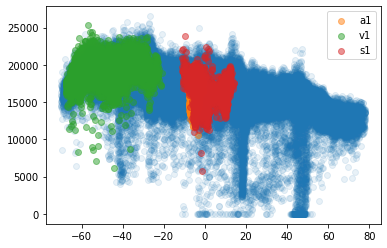

In [58]:
plt.scatter(rc_coord[other],mean_staining_intensity[other],alpha=0.1)
plt.scatter(rc_coord[a1],mean_staining_intensity[a1],alpha=0.5,label='a1')
plt.scatter(rc_coord[v1],mean_staining_intensity[v1],alpha=0.5,label='v1')
plt.scatter(rc_coord[s1],mean_staining_intensity[s1],alpha=0.5,label='s1')
plt.legend()


In [60]:
#We do see the rostrocaudal staining gradient,
#but staining intensity is influenced by multiple factors including cell body size,
#and methodological steps like optical balancing.
#We don't see clear evidence of primary sensory areas being more dense